In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Exploratory Data Analysis (EDA)**

In [2]:
# Download data
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

# View multiple lines
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
# Checking information about columns, their types and the number of non-zero values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
# Statistical review of numerical variables
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [5]:
# Check for missing values
print(train.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [6]:
# Count the number of unique values for each column
unique_counts = train.nunique()
unique_percentage = (unique_counts / len(train)) * 100

unique_info = pd.DataFrame({'Unique Count': unique_counts, 'Unique Percentage': unique_percentage})
unique_info = unique_info.sort_values(by='Unique Percentage', ascending=False)

print(unique_info)

                                       Unique Count  Unique Percentage
id                                           140700         100.000000
Name                                            422           0.299929
CGPA                                            331           0.235252
Degree                                          115           0.081734
City                                             98           0.069652
Profession                                       64           0.045487
Age                                              43           0.030561
Sleep Duration                                   36           0.025586
Dietary Habits                                   23           0.016347
Work/Study Hours                                 13           0.009240
Financial Stress                                  5           0.003554
Study Satisfaction                                5           0.003554
Job Satisfaction                                  5           0.003554
Work P

At this stage, It is worth removing the columns: Name, CGPA, Degree, City, Profession. Because these columns have quite a large number of unique fields.

In [7]:
columns_to_check = train.iloc[:, 1:-1]
duplicates = columns_to_check.duplicated()
print(f"Number of duplicates (excluding first and last columns): {duplicates.sum()}")


Number of duplicates (excluding first and last columns): 0


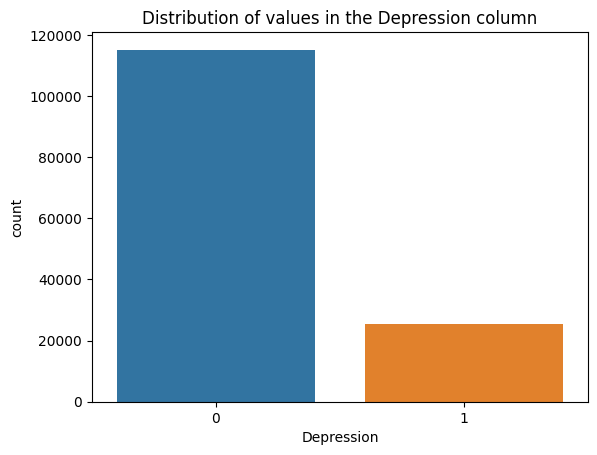

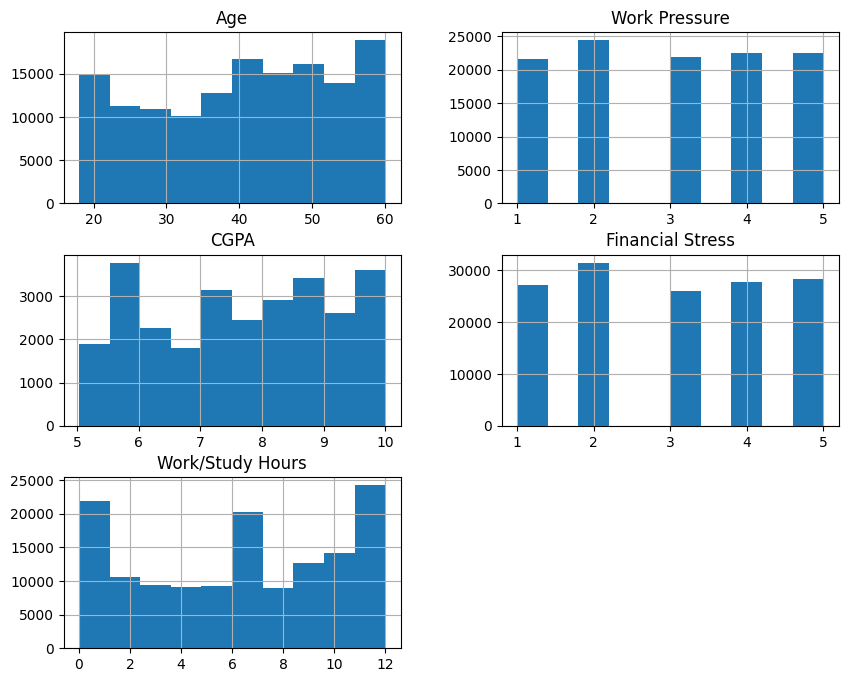

In [8]:
# Histogram for the target variable
sns.countplot(x='Depression', data=train)
plt.title('Distribution of values ​​in the Depression column')
plt.show()

# Histogram for numeric variables
train[['Age', 'Work Pressure', 'CGPA', 'Financial Stress', 'Work/Study Hours']].hist(figsize=(10, 8))
plt.show()

There are no anomalies.

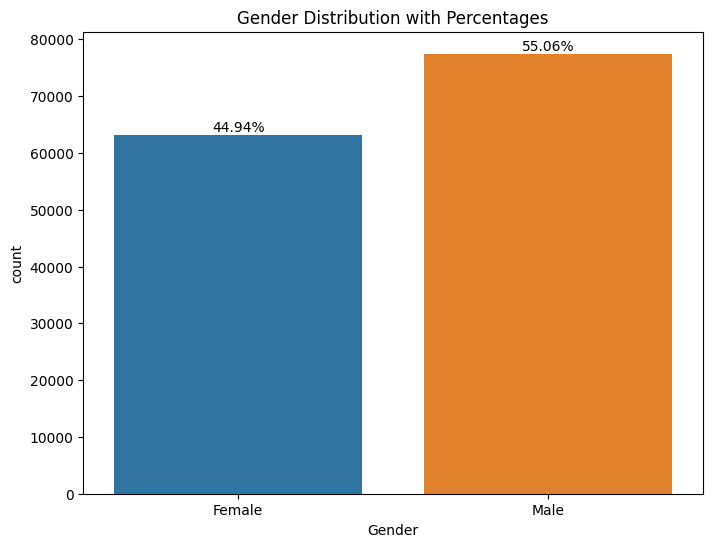

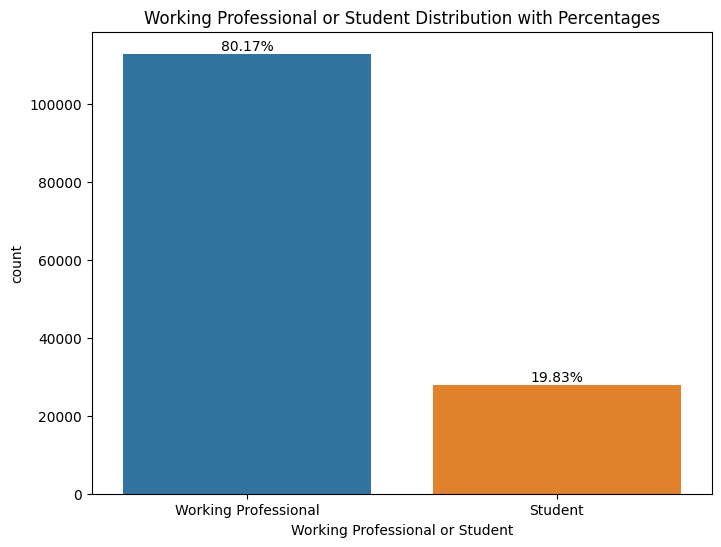

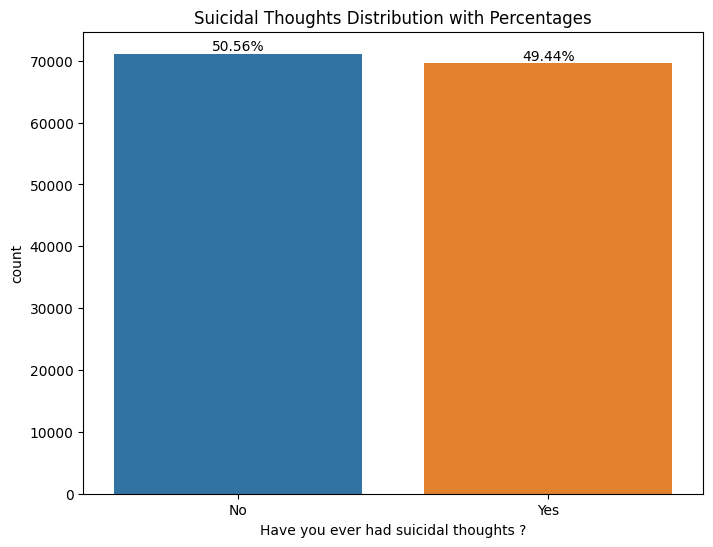

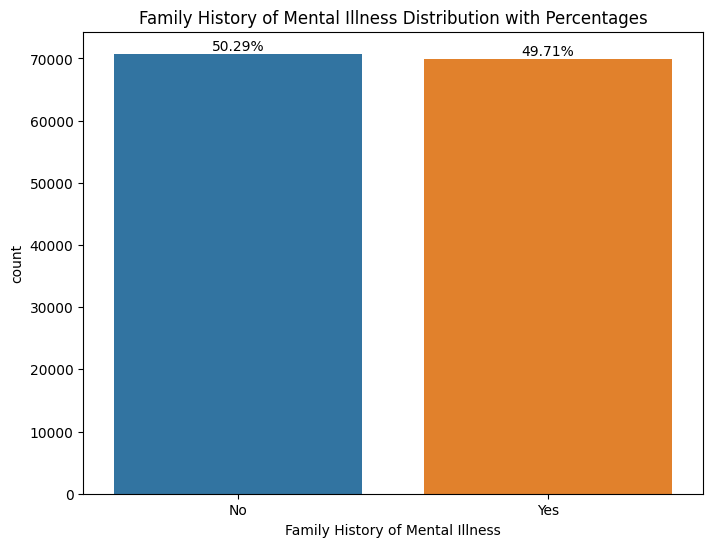

In [9]:
# Function to add interest
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.2f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

# Bar plots for categorical variables
# 1. Gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=train)
add_percentage(ax, len(train))
plt.title('Gender Distribution with Percentages')
plt.show()

# 2. Working Professional or Student
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Working Professional or Student', data=train)
add_percentage(ax, len(train))
plt.title('Working Professional or Student Distribution with Percentages')
plt.show()

# 3. Suicidal Thoughts
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Have you ever had suicidal thoughts ?', data=train)
add_percentage(ax, len(train))
plt.title('Suicidal Thoughts Distribution with Percentages')
plt.show()

# 4. Family History of Mental Illness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Family History of Mental Illness', data=train)
add_percentage(ax, len(train))
plt.title('Family History of Mental Illness Distribution with Percentages')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Перетворення Gender Distribution
label_encoder_gender = LabelEncoder()
train['Work/Study Hours'] = label_encoder_gender.fit_transform(train['Work/Study Hours'])
test['Work/Study Hours'] = label_encoder_gender.transform(test['Work/Study Hours'])

# Перетворення Working Professional or Student
label_encoder_wps = LabelEncoder()
train['Working Professional or Student'] = label_encoder_wps.fit_transform(train['Working Professional or Student'])
test['Working Professional or Student'] = label_encoder_wps.transform(test['Working Professional or Student'])

# Перевірка результатів
print(train[['Work/Study Hours', 'Working Professional or Student']].head())


   Work/Study Hours  Working Professional or Student
0                 1                                1
1                 7                                1
2                 3                                0
3                10                                1
4                 9                                1


At this stage, It is worth removing the columns: Gender, Working Professional or Student, Have you ever had suicidal thoughts ?, Family History of Mental Illness. Because the ratio of opposite values ​​is almost equal

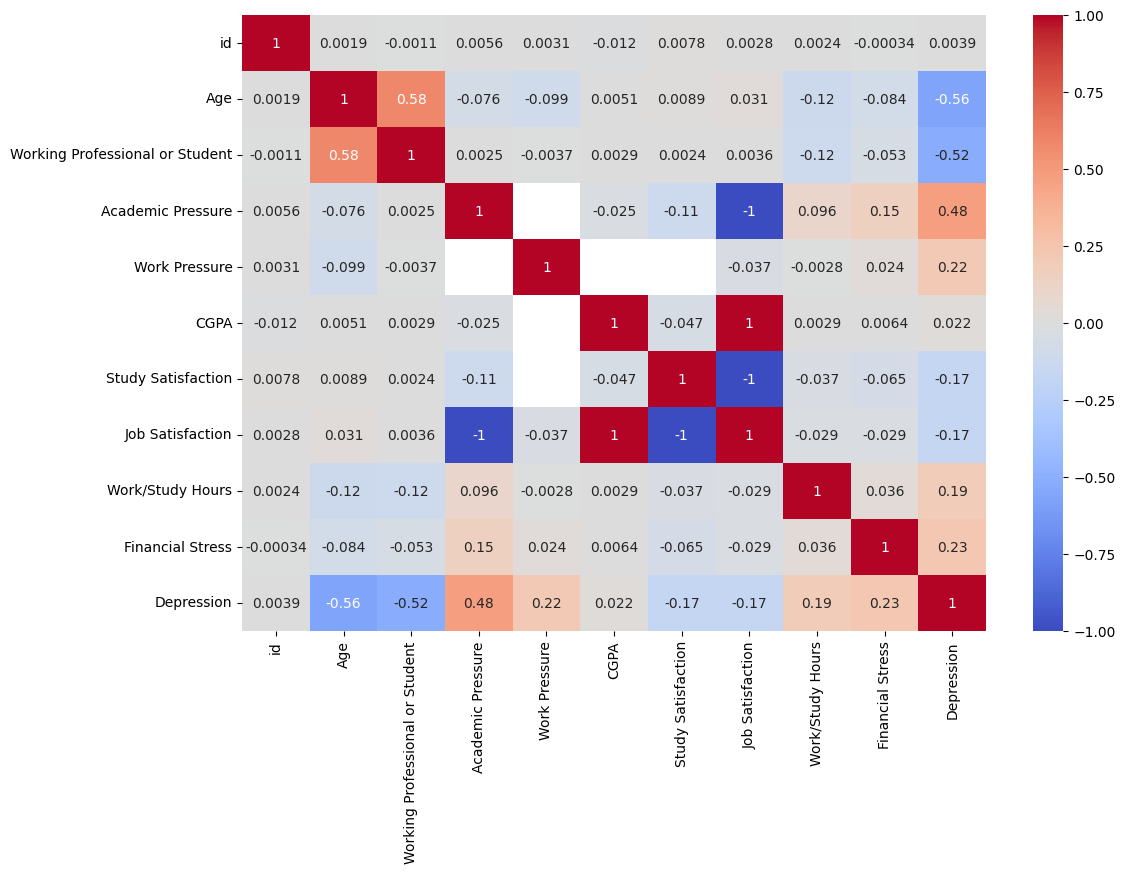

In [11]:
# Selecting only numeric columns
numeric_cols = train.select_dtypes(include=['number']).columns

# Correlation matrix for numerical variables
corr_matrix = train[numeric_cols].corr()

# Visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



It is advisable to merge the columns "Study Satisfaction" and "Job Satisfaction," as well as "Academic Pressure" and "Work Pressure." These tables are complementary, meaning that if the value in the "Working Professional or Student" column is "Student," data will only be present in columns related to education, and similarly for employees, data will be present in columns related to work. However, not all students have data in the necessary columns, so missing values will be filled with the median. As a result, the five columns will be reduced to just two.

**Dataset Preparation**

In [12]:
# === Data Preparation ===
# Combining "Pressure" and "Satisfaction" columns for training data
train['Pressure'] = train['Academic Pressure'].fillna(train['Work Pressure'])
train['Satisfaction'] = train['Study Satisfaction'].fillna(train['Job Satisfaction'])

# Median values for filling missing data
median_academic_pressure = train.loc[train['Working Professional or Student'] == 0, 'Academic Pressure'].median()
median_study_satisfaction = train.loc[train['Working Professional or Student'] == 0, 'Study Satisfaction'].median()
median_work_pressure = train.loc[train['Working Professional or Student'] == 1, 'Work Pressure'].median()
median_job_satisfaction = train.loc[train['Working Professional or Student'] == 1, 'Job Satisfaction'].median()
median_financial_stress = train['Financial Stress'].median()

def fill_pressure(row):
    if not pd.isnull(row['Pressure']):
        return row['Pressure']
    if row['Working Professional or Student'] == 0:
        return row['Academic Pressure'] if not pd.isnull(row['Academic Pressure']) else median_academic_pressure
    else:
        return row['Work Pressure'] if not pd.isnull(row['Work Pressure']) else median_work_pressure

def fill_satisfaction(row):
    if not pd.isnull(row['Satisfaction']):
        return row['Satisfaction']
    if row['Working Professional or Student'] == 0:
        return row['Study Satisfaction'] if not pd.isnull(row['Study Satisfaction']) else median_study_satisfaction
    else:
        return row['Job Satisfaction'] if not pd.isnull(row['Job Satisfaction']) else median_job_satisfaction

train['Pressure'] = train.apply(fill_pressure, axis=1)
train['Satisfaction'] = train.apply(fill_satisfaction, axis=1)

# Filling "Financial Stress" in training data
train['Financial Stress'].fillna(median_financial_stress, inplace=True)

# Removing unnecessary columns in training data
columns_to_drop = ['CGPA', 'Name', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 
                   'Study Satisfaction', 'Job Satisfaction', 'Degree', 
                   'Family History of Mental Illness', 'Gender', 
                   'Have you ever had suicidal thoughts ?', 'Sleep Duration', 
                   'Dietary Habits']
train.drop(columns=columns_to_drop, axis=1, inplace=True)

In [13]:
# Output of final data information
print(train.isnull().sum())
print(train.info())

id                                 0
Age                                0
Working Professional or Student    0
Work/Study Hours                   0
Financial Stress                   0
Depression                         0
Pressure                           0
Satisfaction                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               140700 non-null  int64  
 1   Age                              140700 non-null  float64
 2   Working Professional or Student  140700 non-null  int64  
 3   Work/Study Hours                 140700 non-null  int64  
 4   Financial Stress                 140700 non-null  float64
 5   Depression                       140700 non-null  int64  
 6   Pressure                         140700 non-null  float64
 7   Satisfact

In [14]:
# === APPLYING SAME TRANSFORMATIONS TO TEST DATA ===

# Step 1: Combining "Pressure" and "Satisfaction" columns in test data
test['Pressure'] = test['Academic Pressure'].fillna(test['Work Pressure'])
test['Satisfaction'] = test['Study Satisfaction'].fillna(test['Job Satisfaction'])

# Step 2: Filling gaps in "Pressure" and "Satisfaction" based on student/professional group
def fill_pressure_test(row):
    if not pd.isnull(row['Pressure']):
        return row['Pressure']
    if row['Working Professional or Student'] == 0:
        return row['Academic Pressure'] if not pd.isnull(row['Academic Pressure']) else median_academic_pressure
    else:
        return row['Work Pressure'] if not pd.isnull(row['Work Pressure']) else median_work_pressure

def fill_satisfaction_test(row):
    if not pd.isnull(row['Satisfaction']):
        return row['Satisfaction']
    if row['Working Professional or Student'] == 0:
        return row['Study Satisfaction'] if not pd.isnull(row['Study Satisfaction']) else median_study_satisfaction
    else:
        return row['Job Satisfaction'] if not pd.isnull(row['Job Satisfaction']) else median_job_satisfaction

# Apply transformations to test data
test['Pressure'] = test.apply(fill_pressure_test, axis=1)
test['Satisfaction'] = test.apply(fill_satisfaction_test, axis=1)

# Step 3: Filling "Financial Stress" in test data
test['Financial Stress'].fillna(median_financial_stress, inplace=True)

# Step 4: Removing unnecessary columns in test data
columns_to_drop = ['CGPA', 'Name', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 
                   'Study Satisfaction', 'Job Satisfaction', 'Degree', 
                   'Family History of Mental Illness', 'Gender', 
                   'Have you ever had suicidal thoughts ?', 'Sleep Duration', 
                   'Dietary Habits']

test.drop(columns=columns_to_drop, axis=1, inplace=True)

# === VALIDATING THE FINAL TEST DATA ===
print(test.isnull().sum())  # Check for missing values in the test data
print(test.info())          # Display test data structure and column types


id                                 0
Age                                0
Working Professional or Student    0
Work/Study Hours                   0
Financial Stress                   0
Pressure                           0
Satisfaction                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               93800 non-null  int64  
 1   Age                              93800 non-null  float64
 2   Working Professional or Student  93800 non-null  int64  
 3   Work/Study Hours                 93800 non-null  int64  
 4   Financial Stress                 93800 non-null  float64
 5   Pressure                         93800 non-null  float64
 6   Satisfaction                     93800 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 5.0 MB
None


In [15]:
# === Preparing Features and Target ===
scaler = StandardScaler()
X_train = scaler.fit_transform(train.drop('Depression', axis=1).values)
y_train = train['Depression'].values.reshape(-1, 1)

features = train.drop('Depression', axis=1).columns
X_test = scaler.transform(test[features].values)

In [16]:
# === Neural Network Definition ===
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, num_iterations, l2_lambda):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.l2_lambda = l2_lambda

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.bias2 = np.zeros((1, output_size))

        self.losses = []
        self.accuracies = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def binary_cross_entropy_loss(self, predictions, y):
        m = y.shape[0]
        loss = -(1 / m) * np.sum(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        l2_loss = (self.l2_lambda / (2 * m)) * (np.sum(np.square(self.weights1)) + np.sum(np.square(self.weights2)))
        return loss + l2_loss

    def accuracy(self, predictions, y):
        return np.mean((predictions >= 0.5) == y)

    def fit(self, X, y):
        m = X.shape[0]

        for i in range(self.num_iterations):
            # Forward pass
            z1 = np.dot(X, self.weights1) + self.bias1
            a1 = self.relu(z1)
            z2 = np.dot(a1, self.weights2) + self.bias2
            predictions = self.sigmoid(z2)

            # Compute loss
            loss = self.binary_cross_entropy_loss(predictions, y)
            self.losses.append(loss)

            # Backward pass
            dz2 = predictions - y
            dw2 = (1 / m) * np.dot(a1.T, dz2) + (self.l2_lambda / m) * self.weights2
            db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

            dz1 = np.dot(dz2, self.weights2.T) * self.relu_derivative(z1)
            dw1 = (1 / m) * np.dot(X.T, dz1) + (self.l2_lambda / m) * self.weights1
            db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

            # Update weights and biases
            self.weights2 -= self.learning_rate * dw2
            self.bias2 -= self.learning_rate * db2
            self.weights1 -= self.learning_rate * dw1
            self.bias1 -= self.learning_rate * db1

            # Compute accuracy
            acc = self.accuracy(predictions, y)
            self.accuracies.append(acc)

            # Print progress
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

    def predict(self, X):
        z1 = np.dot(X, self.weights1) + self.bias1
        a1 = self.relu(z1)
        z2 = np.dot(a1, self.weights2) + self.bias2
        predictions = self.sigmoid(z2)
        return (predictions >= 0.5).astype(int)

    def plot_learning_curve(self, start=0, end=None):
        plt.figure(figsize=(12, 5))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(range(start, end if end else len(self.losses)), self.losses[start:end], label='Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss over Iterations')
        plt.legend()

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(start, end if end else len(self.accuracies)), self.accuracies[start:end], label='Accuracy', color='orange')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.title('Accuracy over Iterations')
        plt.legend()

        plt.show()

In [17]:
# === Model Training ===
model = NeuralNetwork(len(features), 64, 1, 0.3, 2001, 0.01)
model.fit(X_train, y_train)

Iteration 0: Loss = 1.0381, Accuracy = 0.4339
Iteration 100: Loss = 0.2083, Accuracy = 0.9146
Iteration 200: Loss = 0.2029, Accuracy = 0.9167
Iteration 300: Loss = 0.2004, Accuracy = 0.9174
Iteration 400: Loss = 0.1988, Accuracy = 0.9177
Iteration 500: Loss = 0.1978, Accuracy = 0.9181
Iteration 600: Loss = 0.1971, Accuracy = 0.9181
Iteration 700: Loss = 0.1966, Accuracy = 0.9182
Iteration 800: Loss = 0.1961, Accuracy = 0.9183
Iteration 900: Loss = 0.1958, Accuracy = 0.9184
Iteration 1000: Loss = 0.1955, Accuracy = 0.9185
Iteration 1100: Loss = 0.1952, Accuracy = 0.9186
Iteration 1200: Loss = 0.1950, Accuracy = 0.9185
Iteration 1300: Loss = 0.1948, Accuracy = 0.9186
Iteration 1400: Loss = 0.1947, Accuracy = 0.9186
Iteration 1500: Loss = 0.1946, Accuracy = 0.9186
Iteration 1600: Loss = 0.1945, Accuracy = 0.9186
Iteration 1700: Loss = 0.1944, Accuracy = 0.9186
Iteration 1800: Loss = 0.1943, Accuracy = 0.9186
Iteration 1900: Loss = 0.1942, Accuracy = 0.9186
Iteration 2000: Loss = 0.1941, A

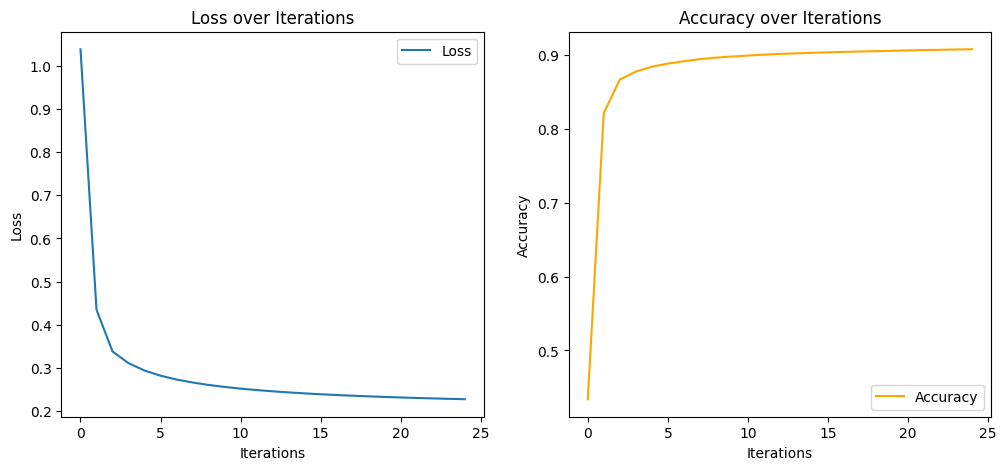

In [18]:
# Plot learning curve
model.plot_learning_curve(start=0, end=25)

In [19]:
# === Generate Submission File ===
print("Generating Submission File...")
predictions = model.predict(X_test)
submission = pd.DataFrame({'id': test['id'], 'Depression': predictions.flatten()})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Generating Submission File...
Submission file saved as 'submission.csv'
